# Problema de Negocio

### Descripción

Lucas ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Lucas a mejorar ese modelo?

### Evaluación

Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión.

RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.

$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{d_i - f_i}{\sigma_i}\right)^2}$$

### Referencia

[Iván Cordero. (2024). Plan de negocio – DataTops®. Kaggle.](https://kaggle.com/competitions/datatops)


# Objetivo

Hacer una análisis del set de datos en bruto para comprender las variables. 

# 0. Librerías

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Añadir el path raíz "src"
root_path = os.path.abspath(os.path.join(os.getcwd(), '..')) 
if os.path.exists(root_path) and root_path not in sys.path: 
    sys.path.append(root_path)

from utils import datascience as ds
from utils import vizdatatools as viz

# Estilo moderno para Seaborn
sns.set_theme(style='darkgrid', palette='bright')

# 1. Entendiendo el problema de negocio

El principal objetivo del proyecto es crear un modelo de Machine Learning que permita a Lucas:

- Establecer precios precisos: Determinar el precio de venta ideal para cada portátil, considerando sus características técnicas.

- El rendimiento del modelo será evaluado utilizando el Error Cuadrático Medio (RMSE).

- Contamos con dos sets de trabajo:
    - `train.csv`: set de *train* sobre el que evaluaré las métricas y con el que entrenaré el modelo.
    - `test.csv`: set de *test* con el que predecir los precios de los portátiles, cuyo resultado (*submission*) se cargará a Kaggle.


# 2. Obtener datos y un primer vistazo.

In [2]:
# Cargar dataset
df_train = pd.read_csv('../data/train.csv', index_col=0)
# df_train.index.name = None
df_train.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [3]:
# Información del DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
# Ver valores únicos de las columnas
for col in df_train.columns:
    print(col)
    display(df_train[col].unique())

Company


array(['HP', 'Dell', 'Apple', 'Lenovo', 'MSI', 'Toshiba', 'Acer', 'Chuwi',
       'Asus', 'Huawei', 'Razer', 'Mediacom', 'Google', 'Samsung',
       'Xiaomi', 'Microsoft', 'Vero', 'LG', 'Fujitsu'], dtype=object)

Product


array(['250 G6', 'Inspiron 7559', 'ProBook 450', 'Macbook Air',
       'Inspiron 3567', 'ProBook 650', 'Envy 13-AD007nv',
       'IdeaPad 320-15IKB', 'GL72M 7REX', 'Thinkpad T570', 'MacBook Pro',
       'Ideapad 320-15IKBR', 'IdeaPad 320-15IAP', 'Portege Z30-C-16P',
       'Latitude 5590', 'IdeaPad 110-15IBR', 'GP72MVR 7RFX',
       'ThinkPad X1', 'GL62 6QF', 'Portege X30-D-10X', 'Chromebook 11',
       'Inspiron 5567', 'IdeaPad 510s-14IKB', 'LapBook 15.6"',
       'GE62 Apache', 'ZBook 17', 'Inspiron 7567', 'VivoBook Pro',
       'Pro P2540UA-XO0198T', 'Thinkpad 13', 'MateBook X', 'Vostro 5568',
       '250 G5', 'EliteBook 840', 'Inspiron 7570', 'IdeaPad Y700-15ISK',
       'ThinkPad P51', 'IdeaPad 320-15IKBN', 'Portege Z30-C-1CV',
       'XPS 13', 'IdeaPad 510-15IKB',
       '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)', 'Blade Pro',
       'Rog Strix', 'ProBook 440', '15-AC110nv (i7-6500U/6GB/1TB/Radeon',
       'Probook 440', 'FX753VD-GC071T (i7-7700HQ/8GB/1TB/GeForce',
       'GS73VR 

TypeName


array(['Notebook', 'Gaming', 'Ultrabook', 'Workstation', 'Netbook',
       '2 in 1 Convertible'], dtype=object)

Inches


array([15.6, 13.3, 14. , 17.3, 11.6, 13. , 12. , 10.1, 12.5, 12.3, 15. ,
       14.1, 13.5, 11.3, 13.9, 15.4, 18.4])

ScreenResolution


array(['Full HD 1920x1080', '1440x900', '1366x768',
       'IPS Panel Full HD 1920x1080', 'IPS Panel 4K Ultra HD 3840x2160',
       'IPS Panel Retina Display 2560x1600', 'Touchscreen 1366x768',
       'IPS Panel Quad HD+ 2560x1440', 'IPS Panel 1366x768',
       'Full HD / Touchscreen 1920x1080', 'IPS Panel Full HD 2160x1440',
       'Quad HD+ 3200x1800', '4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'IPS Panel Touchscreen 1920x1200',
       'IPS Panel Touchscreen 2560x1440', 'Touchscreen 2400x1600',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2560x1440', 'Quad HD+ / Touchscreen 3200x1800',
       '4K Ultra HD 3840x2160',
       'IPS Panel Quad HD+ / Touchscreen 3200x1800',
       'Touchscreen 2256x1504', '1600x900',
       'IPS Panel Touchscreen 1366x768',
       'Touchscreen / Quad HD+ 3200x1800', 'IPS Panel 2560x1440',
       'IPS Panel Quad HD+ 3200x

Cpu


array(['Intel Core i3 6006U 2GHz', 'Intel Core i7 6700HQ 2.6GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i3 6006U 2.0GHz', 'Intel Core i5 7300U 2.6GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Core i7 7700HQ 2.8GHz', 'Intel Core i7 7600U 2.8GHz',
       'Intel Core i5 2.9GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Core i7 6500U 2.5GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Celeron Quad Core N3710 1.6GHz',
       'Intel Celeron Dual Core N3060 1.6GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'Intel Pentium Quad Core N3710 1.6GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core i5 8250U 1.6GHz',
       'AMD Ryzen 1700 3GHz', 'Intel Core i7 7820HK 2.9GHz',
       'Intel Core i5 1.3GHz', 'Intel Pentium Quad Core N3700 1.6GHz',
       'AMD A9-Series A9-9420 3GHz', 'Intel Core i7 7560U 2.4GHz',
       'Intel Core i

Ram


array(['8GB', '16GB', '4GB', '12GB', '32GB', '6GB', '2GB', '64GB', '24GB'],
      dtype=object)

Memory


array(['256GB SSD', '1TB HDD', '128GB Flash Storage',
       '128GB SSD +  1TB HDD', '512GB SSD', '500GB HDD',
       '256GB SSD +  256GB SSD', '128GB SSD', '32GB Flash Storage',
       '64GB Flash Storage', '1.0TB Hybrid', '2TB HDD',
       '256GB Flash Storage', '256GB SSD +  1TB HDD', '180GB SSD',
       '16GB Flash Storage', '1TB SSD', '256GB SSD +  2TB HDD',
       '32GB SSD', '1TB SSD +  1TB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  1TB HDD', '512GB SSD +  512GB SSD',
       '512GB SSD +  256GB SSD', '16GB SSD',
       '64GB Flash Storage +  1TB HDD', '64GB SSD', '128GB HDD',
       '240GB SSD', '512GB SSD +  2TB HDD', '508GB Hybrid', '8GB SSD',
       '256GB SSD +  500GB HDD', '1.0TB HDD', '512GB Flash Storage',
       '1TB HDD +  1TB HDD', '32GB HDD'], dtype=object)

Gpu


array(['Intel HD Graphics 520', 'Nvidia GeForce GTX 960<U+039C>',
       'Nvidia GeForce 930MX', 'Intel HD Graphics 6000',
       'AMD Radeon R5 M430', 'Intel HD Graphics 620',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050 Ti',
       'Intel Iris Graphics 550', 'Intel HD Graphics 505',
       'Intel UHD Graphics 620', 'Intel HD Graphics 405',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce GTX 960M',
       'Intel HD Graphics 400', 'AMD Radeon R7 M445',
       'AMD Radeon R7 M460', 'Intel HD Graphics', 'AMD FirePro W6150M',
       'Nvidia GeForce GTX 1050', 'Nvidia Quadro M1200',
       'AMD Radeon RX 580', 'Nvidia GeForce GTX 1080',
       'AMD Radeon R5 M330', 'Nvidia GeForce GTX 1070',
       'Intel HD Graphics 615', 'AMD Radeon 530', 'AMD Radeon 520',
       'Nvidia Quadro M620', 'Intel Iris Plus Graphics 640',
       'Nvidia Quadro M500M', 'Intel HD Graphics 510',
       'Intel Iris Plus Graphics 650', 'Nvidia GeForce 920MX ',
       'Intel HD Graphics 500', 'AMD Radeo

OpSys


array(['Windows 10', 'macOS', 'Linux', 'No OS', 'Chrome OS', 'Windows 7',
       'Android', 'Windows 10 S', 'Mac OS X'], dtype=object)

Weight


array(['1.86kg', '2.59kg', '2.04kg', '1.34kg', '2.25kg', '2.31kg',
       '1.32kg', '2.2kg', '2.7kg', '2.3kg', '1.37kg', '1.2kg', '1.88kg',
       '1.17kg', '1.05kg', '1.35kg', '1.5kg', '1.89kg', '2.4kg', '3.0kg',
       '2.65kg', '1.99kg', '2.37kg', '1.4kg', '2.36kg', '2.18kg',
       '1.96kg', '1.54kg', '3.14kg', '1.9kg', '1.13kg', '2.6kg', '2.67kg',
       '1.3kg', '1.91kg', '1.95kg', '3.25kg', '1.64kg', '1.44kg',
       '1.26kg', '3.49kg', '2.19kg', '1.63kg', '3kg', '2.43kg', '0.92kg',
       '2.1kg', '2.5kg', '1.48kg', '1.43kg', '2.06kg', '1.23kg', '1.8kg',
       '1.45kg', '1.93kg', '2.32kg', '0.69kg', '1.27kg', '1.25kg',
       '3.35kg', '2.56kg', '2.45kg', '1.47kg', '4.5kg', '2.0kg', '1.36kg',
       '1.1kg', '1.71kg', '1.21kg', '1.7kg', '1.94kg', '1.14kg', '1.6kg',
       '1.29kg', '2.05kg', '1.49kg', '4.36kg', '2.62kg', '2.21kg',
       '1.84kg', '2.17kg', '1.16kg', '2kg', '2.29kg', '2.9kg', '2.8kg',
       '1.65kg', '3.78kg', '2.73kg', '1.252kg', '0.98kg', '2.20kg',
       '

Price_in_euros


array([ 539.  ,  879.01,  900.  ,  898.94,  428.  , 1124.  ,  699.  ,
        499.  , 1348.48, 2445.  , 1958.9 ,  609.  ,  344.  , 1747.  ,
       1298.  ,  329.  , 1409.  , 1686.64, 1169.  , 1285.  ,  355.  ,
        859.01,  799.  ,  244.99, 1229.  , 2899.  ,  949.  , 1350.  ,
        398.99, 1010.  , 1349.  ,  557.37,  836.  ,  500.  , 1000.  ,
       1907.99,  299.  , 1049.  , 1875.  , 1272.  , 1925.  ,  597.  ,
       1195.  , 1268.  ,  709.  ,  485.  ,  439.  , 2199.  , 1049.26,
        735.  ,  295.  , 6099.  ,  764.  , 1084.  , 1187.  , 2449.  ,
        444.  ,  324.  , 1510.  ,  745.  , 1799.  ,  393.49, 1292.  ,
       1189.  , 1513.  ,  650.  , 1763.  , 1379.  , 2050.38,  375.  ,
       1962.99, 1426.66,  589.52, 1072.  ,  549.  , 2040.  , 2339.  ,
        459.  ,  349.  ,  819.  , 1185.43, 1249.26,  255.  ,  465.  ,
        980.  , 1579.  ,  479.  , 1713.49, 2349.  , 1207.  , 1584.  ,
       1049.6 ,  589.  , 1495.  , 1144.5 , 1949.  , 1943.  , 1096.  ,
        229.  , 1149

Tenía la esperanza de poder encontrar en "ScreenResolution" y/o en "Memory" clases que tuvieran la misma información y que se pudieran agrupar, pero parece que están bastante bien escogidas todas las columna categóricas y no hay redundancias.

In [5]:
# Obtener la cardinalidad
ds.get_cardinality(df_train, threshold_categorical=38, threshold_continuous=30.0)

pandas.DataFrame shape: (912, 12)


,Card,%_Card,NaN_Values,%_NaN_Values,Type,Class
Company,19,2.083333,0,0.0,object,Categoric
Product,480,52.631579,0,0.0,object,Numeric - Continuous
TypeName,6,0.657895,0,0.0,object,Categoric
Inches,17,1.864035,0,0.0,float64,Categoric
ScreenResolution,36,3.947368,0,0.0,object,Categoric
Cpu,107,11.732456,0,0.0,object,Numeric - Discrete
Ram,9,0.986842,0,0.0,object,Categoric
Memory,37,4.057018,0,0.0,object,Categoric
Gpu,93,10.197368,0,0.0,object,Numeric - Discrete
OpSys,9,0.986842,0,0.0,object,Categoric


Estoy bastante de acuerdo con la tabla anterior en la propuestas de clases (entre categóricas y numéricas). Voy a considerar como categóricas aquellas features que tengan una cardinalidad porcentual inferior al 5%. Además voy a intentar beneficiarme de que es un dataset compuesto de demasiadas columnas "object".

También es bueno ver que no hay valores missing.

Es un claro problema de regresión, donde el *target* es "Price_in_euros".

# 3. Split de train y validation

Hago esta separación desde el principio para no contaminar los datos.

Aunque antes elimino la columna "Product" porque tiene una cardinalidad tan alta que apenas aporta información.

In [6]:
# Eliminar "Product"
df_train.drop(columns=['Product'], inplace=True)

In [7]:
# Separar set de entrenamiento y de validación
random_state = 42
train_set, val_set = train_test_split(df_train, test_size=0.2, random_state=random_state)

# Variable objetivo para el problema de regresión
target = 'Price_in_euros'

print(train_set.shape)
print(val_set.shape)

(729, 11)
(183, 11)


# 4. Mini-EDA

## 4.1 Transformaciones

Hay dos columnas que son fácilmente transformables a numéricas: "Ram" y "Weight", simplement eliminando algunos caractéres. Voy a tranformarlas, manteniendo la nomenclatura que usa el dataset, y eliminar las originales pues serían redundantes.

In [8]:
# Transformar las columnas "Ram" y "Weight" a numéricas y eliminar las originales
train_set['RamGB'] = train_set['Ram'].str.replace('GB', '').astype(int)
train_set['WeightKg'] = train_set['Weight'].str.replace('kg', '').astype(float)
train_set.drop(['Ram', 'Weight'], axis=1, inplace=True)

val_set['RamGB'] = val_set['Ram'].str.replace('GB', '').astype(int)
val_set['WeightKg'] = val_set['Weight'].str.replace('kg', '').astype(float)
val_set.drop(['Ram', 'Weight'], axis=1, inplace=True)

In [9]:
train_set.describe()

,Inches,Price_in_euros,RamGB,WeightKg
count,729.000000,729.000000,729.000000,729.000000
mean,15.002881,1103.789314,8.233196,2.033752
std,1.428711,672.778174,4.986294,0.668108
min,10.100000,191.900000,2.000000,0.690000
25%,14.000000,598.000000,4.000000,1.500000
50%,15.600000,985.000000,8.000000,2.040000
75%,15.600000,1460.000000,8.000000,2.300000
max,17.300000,6099.000000,64.000000,4.700000


## 4.2 Distribución del target

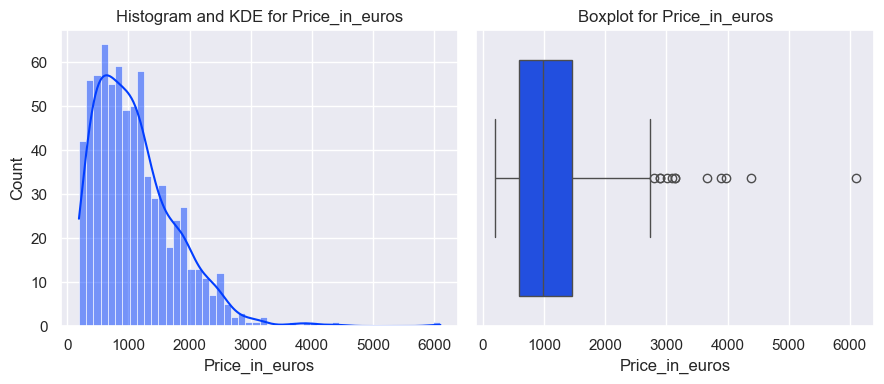

In [10]:
# Crear figura y subgráficas
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Graficar el histograma con KDE en la primera subgráfica
sns.histplot(train_set[target], kde=True, bins=50, ax=axs[0])
axs[0].set_title(f'Histogram and KDE for {target}')
axs[0].set_xlabel(target)

# Graficar el boxplot horizontal en la segunda subgráfica
sns.boxplot(x=train_set[target], ax=axs[1], orient='h')
axs[1].set_title(f'Boxplot for {target}')
axs[1].set_xlabel(target)

# Ajustar el layout
plt.tight_layout()
plt.show()


Hay varios valores outliers por arriba, que si los dejo en el modelo puede que modifiquen la métrica que estoy buscando.

In [11]:
# Calcular los cuartiles y el IQR
Q1 = train_set[target].quantile(0.25)
Q3 = train_set[target].quantile(0.75)
IQR = Q3 - Q1

# Definir límite superior
upper_bound = Q3 + 1.5 * IQR
print('Precio límite de los outliers:', upper_bound, '€.')

Precio límite de los outliers: 2753.0 €.


En general, para modelos como CatBoost y LightGBM, no es necesario transformar el target numérico aunque no siga una distribución gaussiana.

Sin embargo, vamos a considerar transformar el target porque:
- El target tiene valores extremo y un rango muy amplio.
- Para el RMSE, reducir la escala del target puede evitar que valores grandes dominen la métrica de evaluación.

A continuación muestro dos transformaciones no lineales que se pueden emplear en el target (como son la logaritmica y la raíz cuadrada).

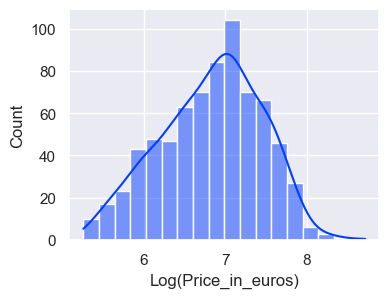

In [12]:
# Transformación logarítmica
plt.figure(figsize=(4, 3))
sns.histplot(np.log(train_set['Price_in_euros']), kde=True)
plt.xlabel('Log(' + target + ')', fontsize=12)  
plt.show()


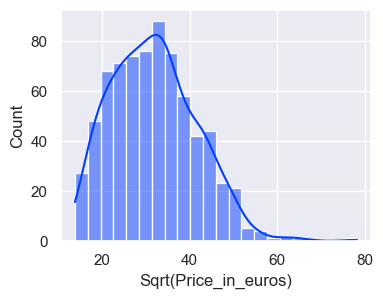

In [13]:
# Transformación raíz cuadrada.
plt.figure(figsize=(4, 3))
sns.histplot(np.sqrt(train_set[target]), kde=True)
plt.xlabel('Sqrt(' + target + ')', fontsize=12)  
plt.show()

La transformación logarítmica parecería más conveniente en este caso.

## 4.3 Análisis bivariante

Voy a inspeccionar visualmente aquellas variables en las que se pueda ver algo.

Definamos primero las variables categóricas de las numéricas.

In [14]:
# Definir variables numéricas, categóricas y categóricas con alta cardinalidad
target = 'Price_in_euros'
num_features = ['WeightKg']
cat_features_high_card = ['Cpu', 'Gpu']
cat_features = [col for col in train_set.columns.to_list() if col not in ([target] + num_features)]

print(target)
print(num_features)
print(cat_features_high_card)
print(cat_features)


Price_in_euros
['WeightKg']
['Cpu', 'Gpu']
['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys', 'RamGB']


#### Inspección de las variables categóricas.

Solo de aquellas que es sencillo hacer una inspección visual, es decir, que tienen una baja cardinalidad.


In [15]:
# Variable para almacenar el máximo número de valores únicos
cat_max_nunique = 0  

for feature in [feat for feat in cat_features if feat not in cat_features_high_card]:
    unique_values = train_set[feature].nunique()
    print(f'{feature}: {unique_values} valores únicos')
        
    # Actualizar el valor máximo si el actual es mayor
    if unique_values > cat_max_nunique:
        cat_max_nunique = unique_values

print(f'El número más alto de valores únicos es: {cat_max_nunique}')


Company: 17 valores únicos
TypeName: 6 valores únicos
Inches: 15 valores únicos
ScreenResolution: 33 valores únicos
Memory: 33 valores únicos
OpSys: 9 valores únicos
RamGB: 8 valores únicos
El número más alto de valores únicos es: 33


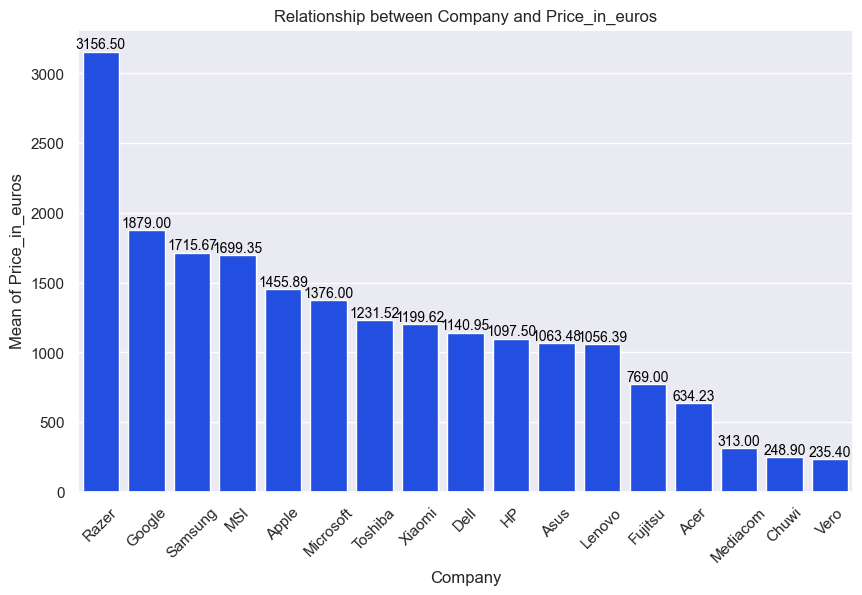

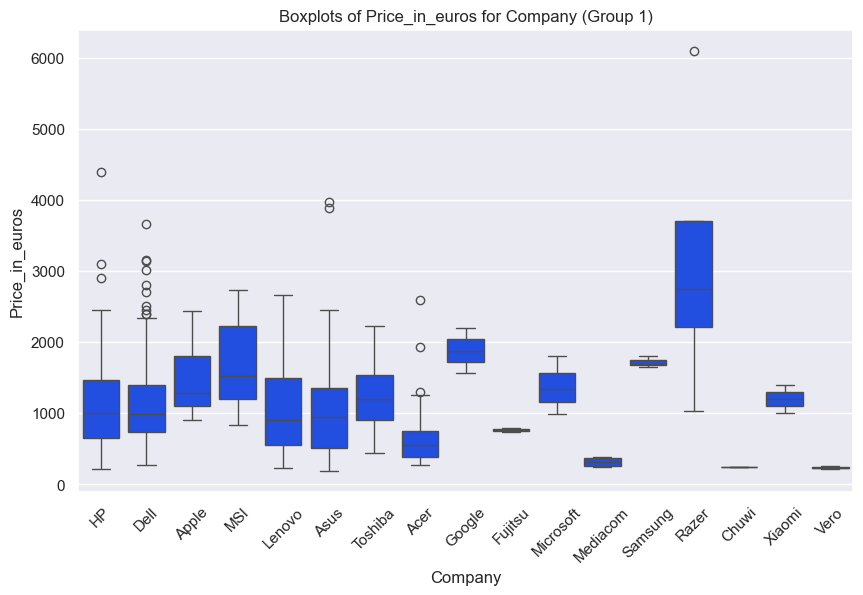

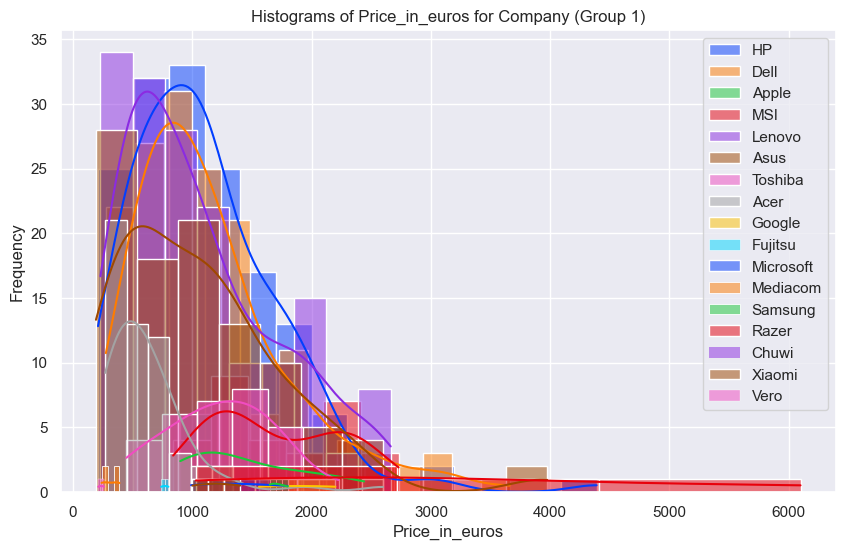

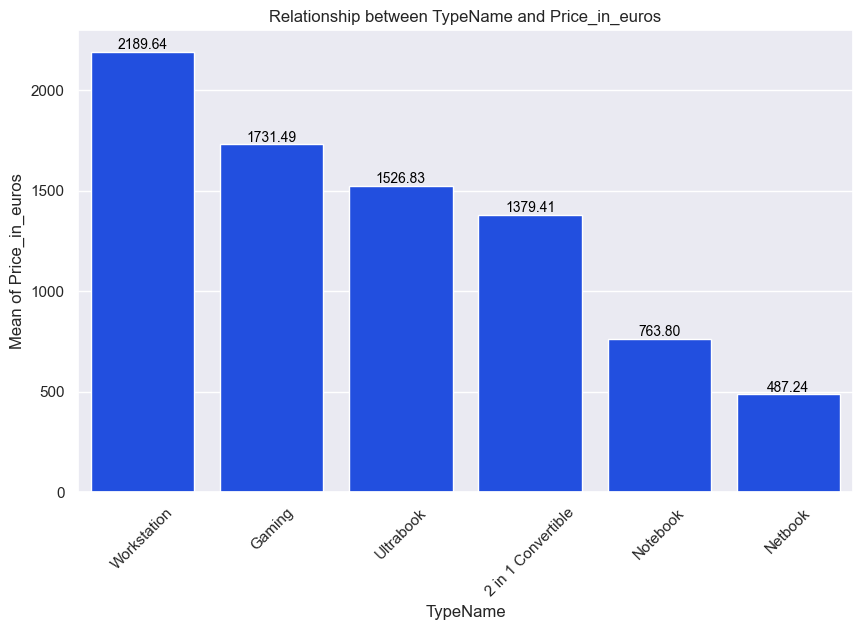

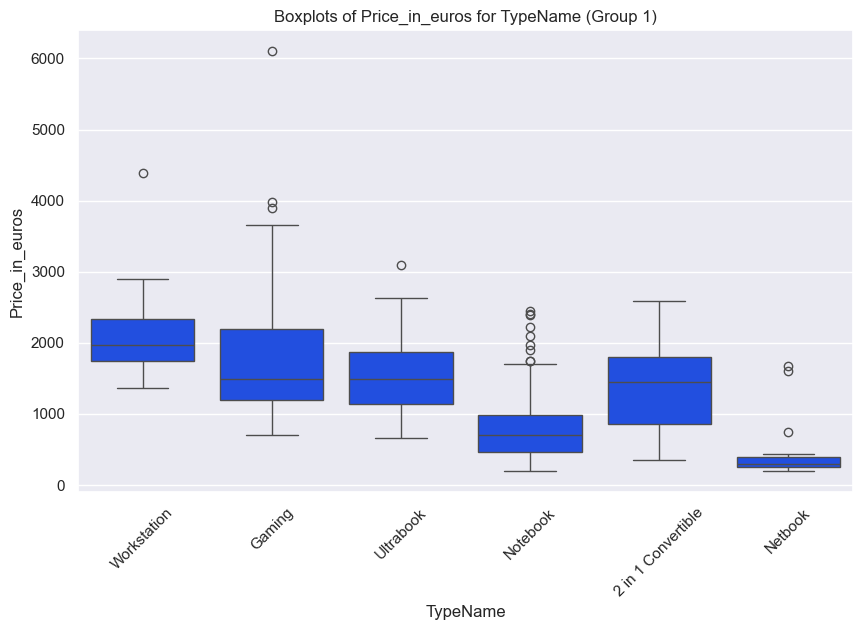

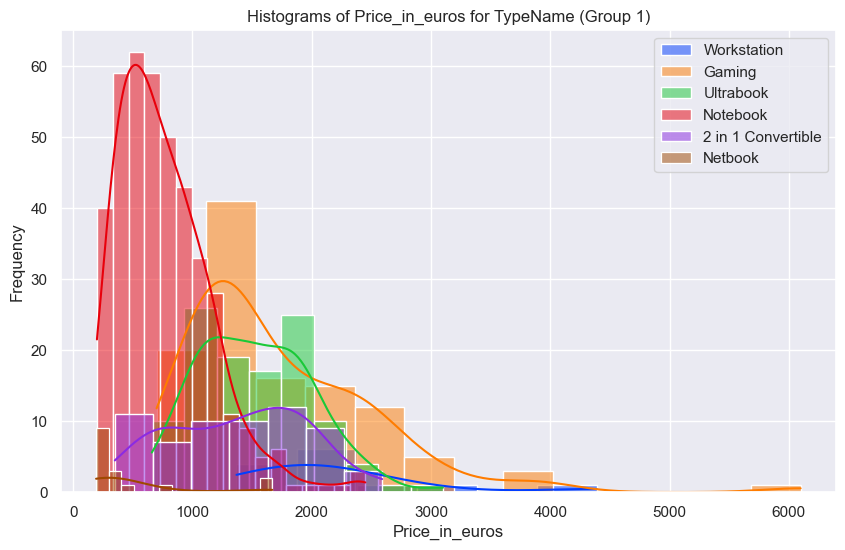

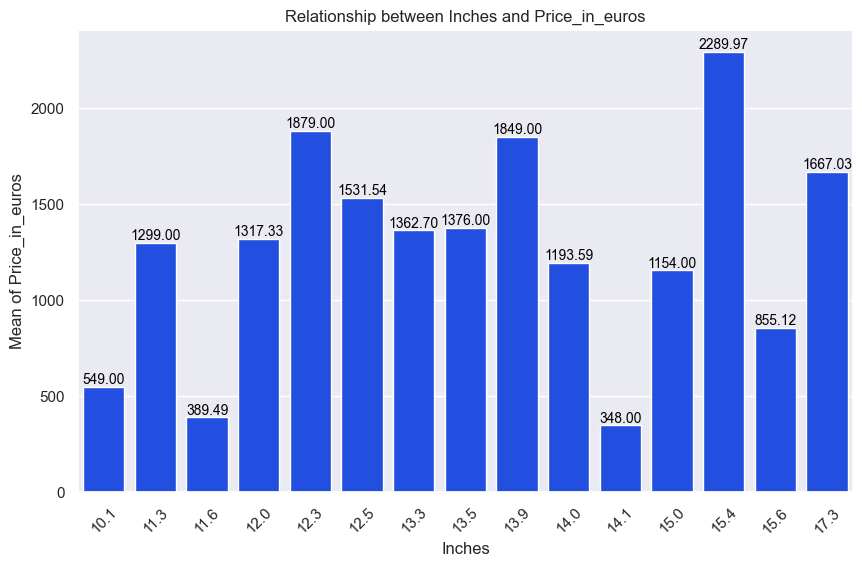

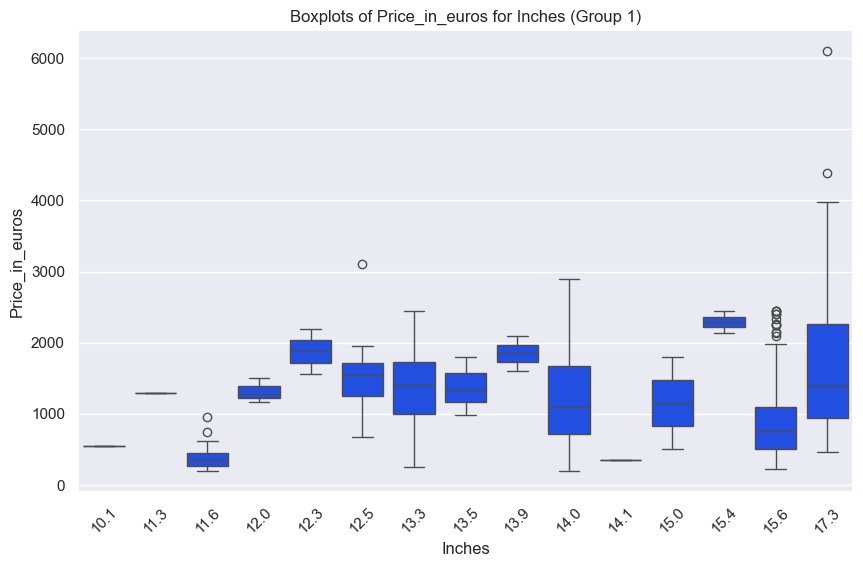

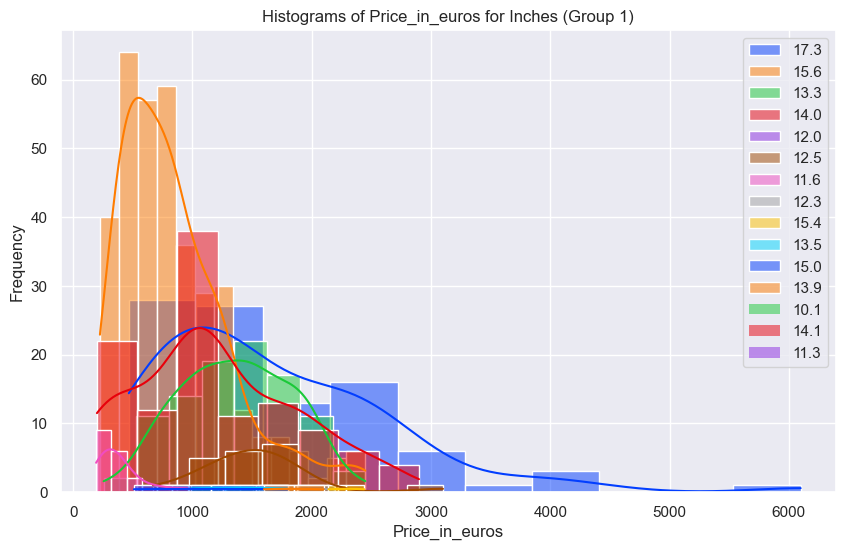

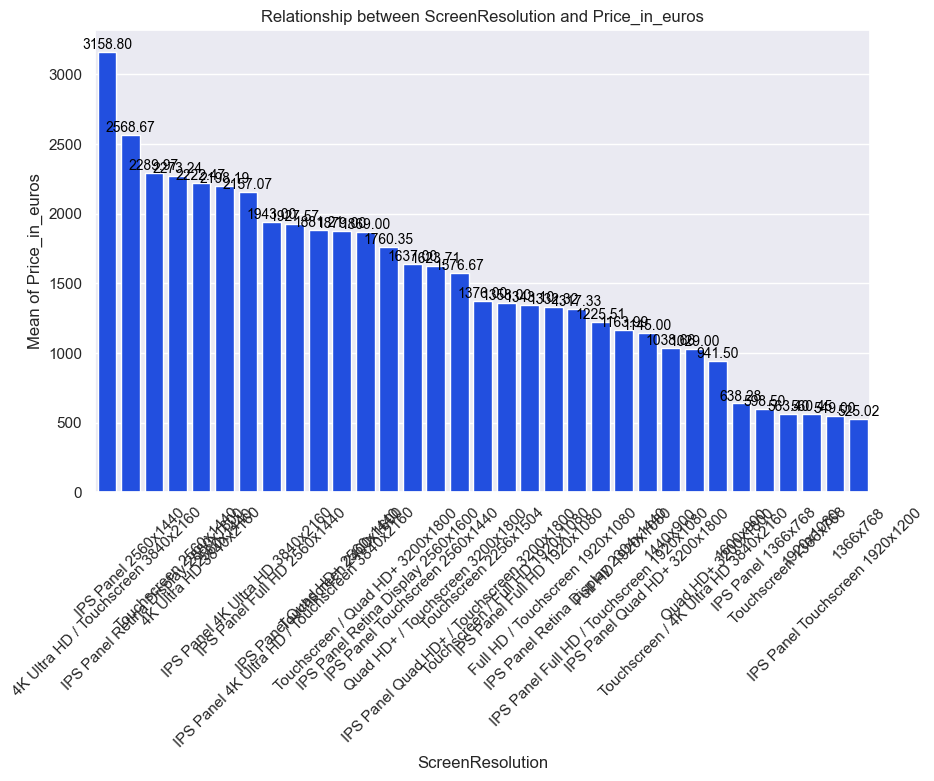

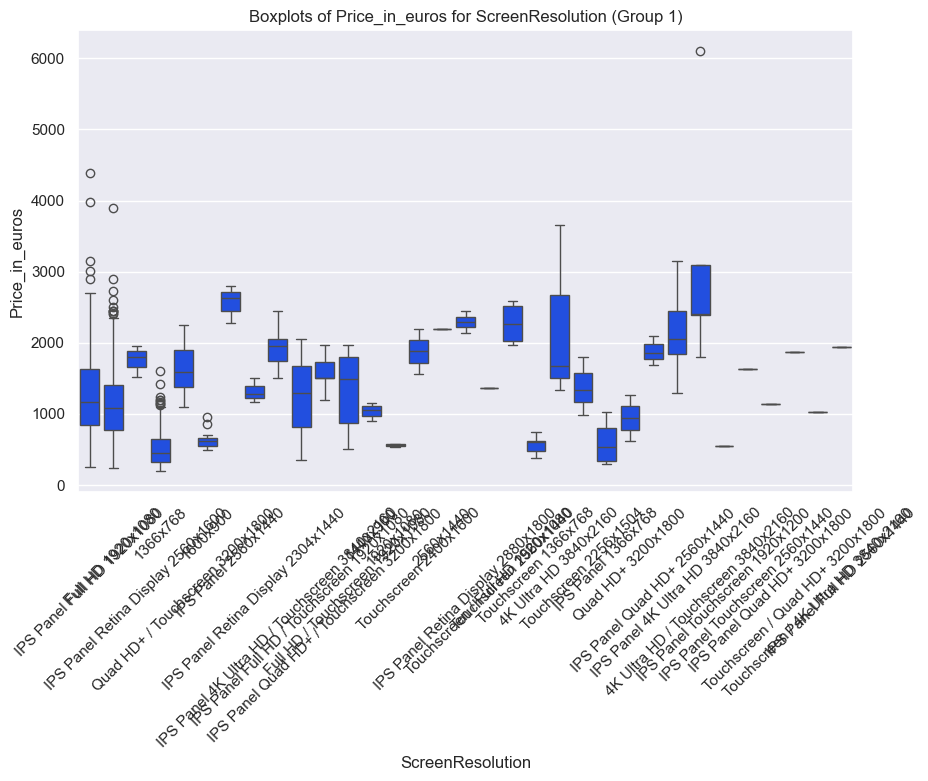

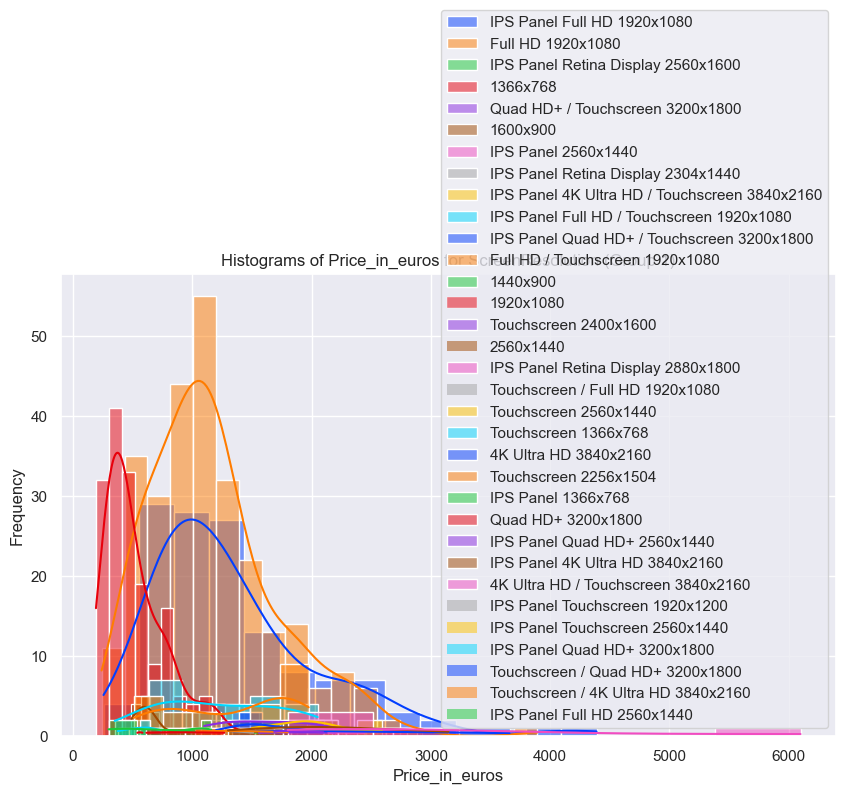

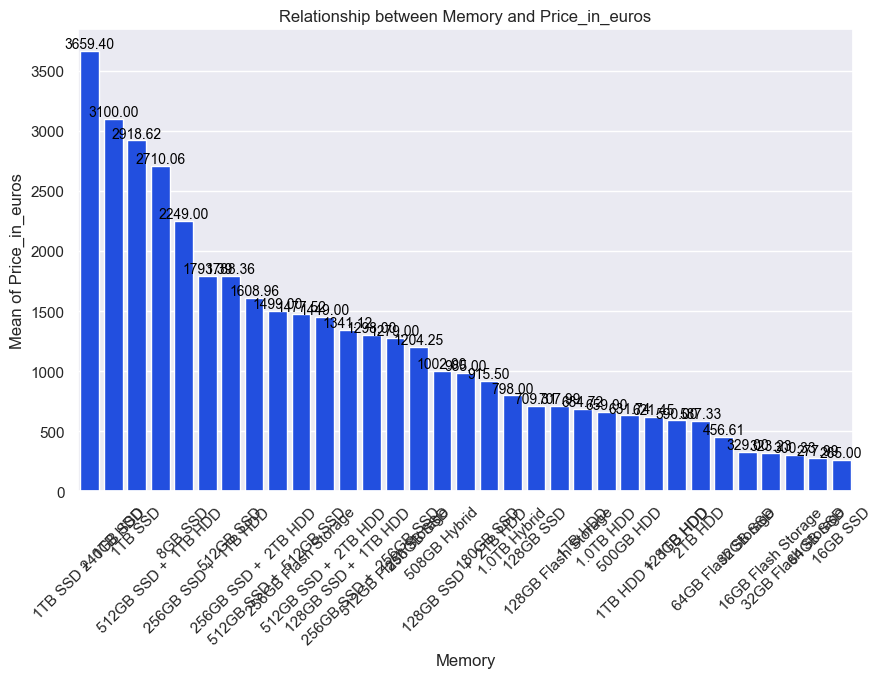

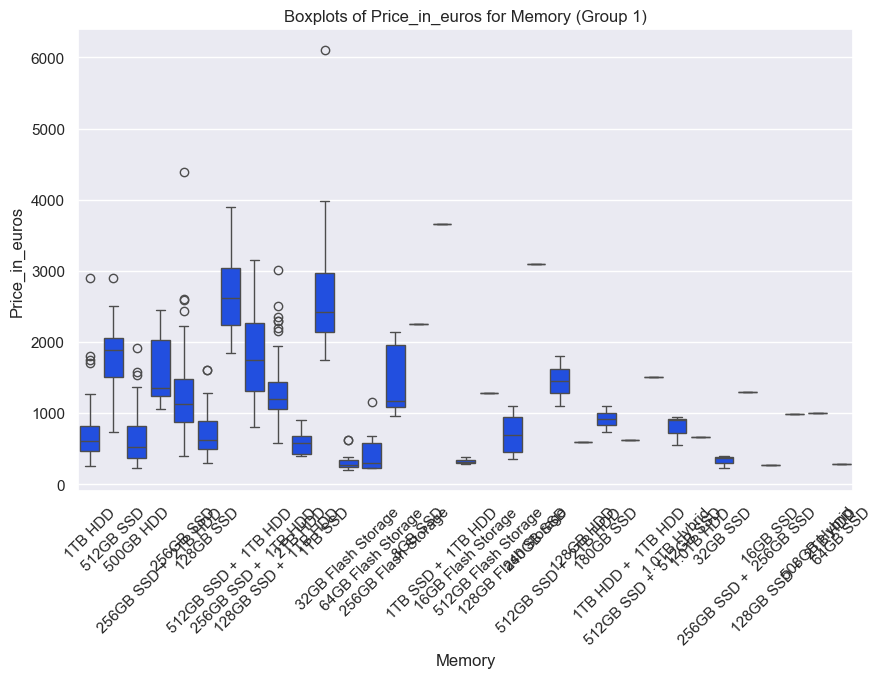

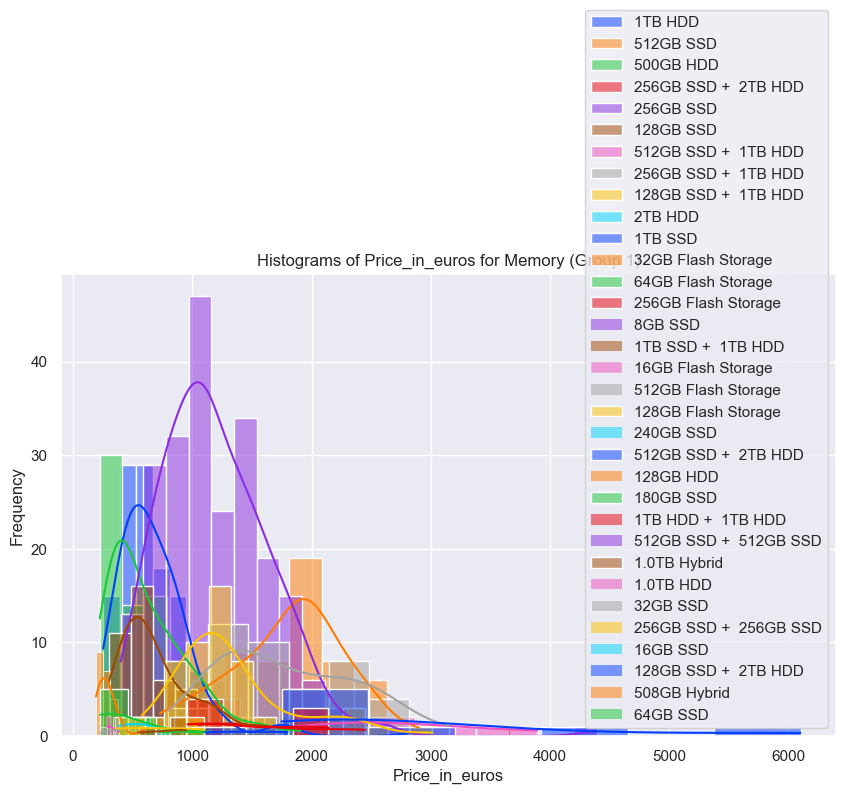

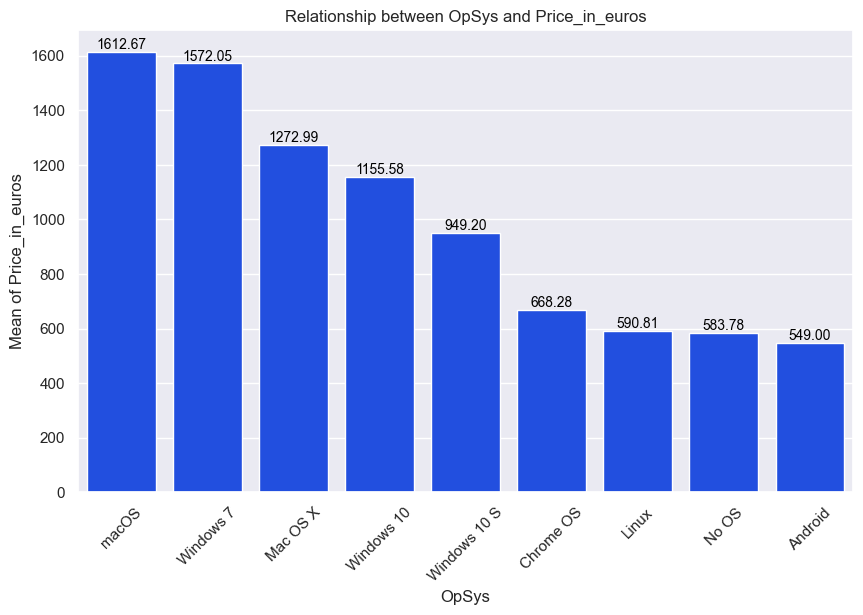

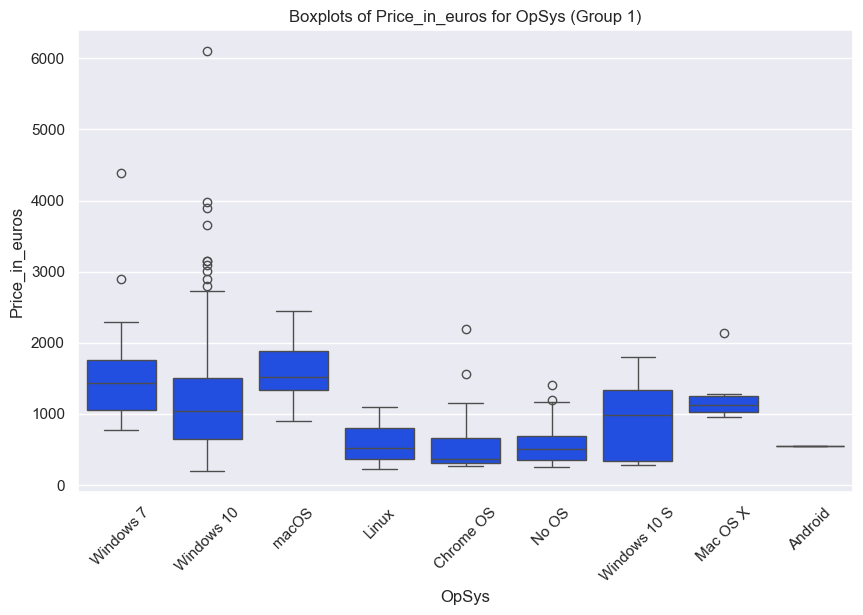

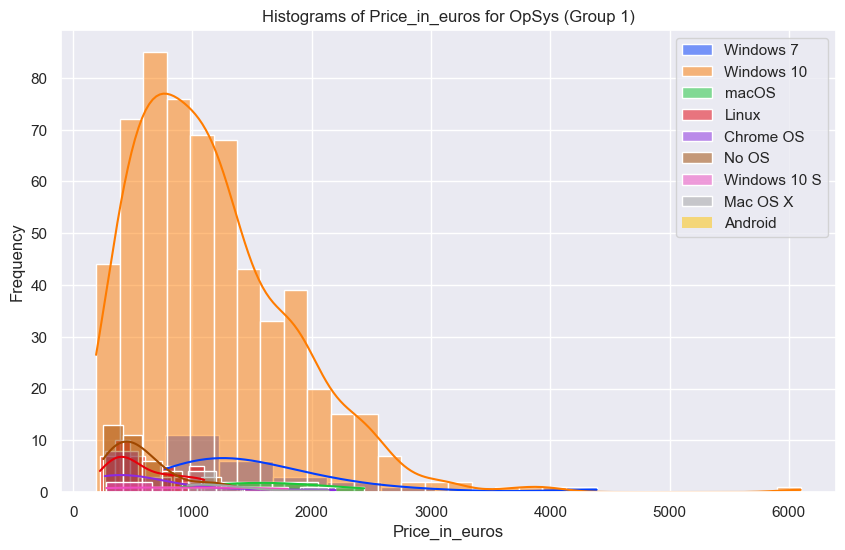

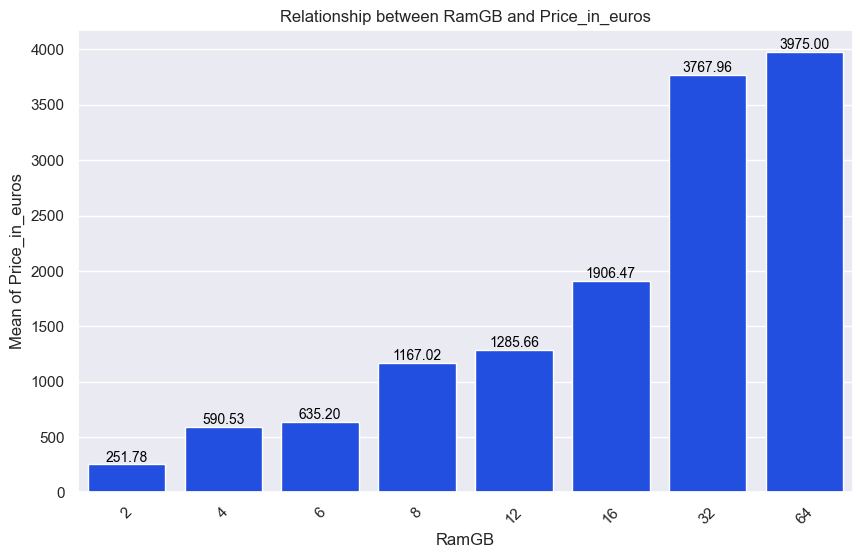

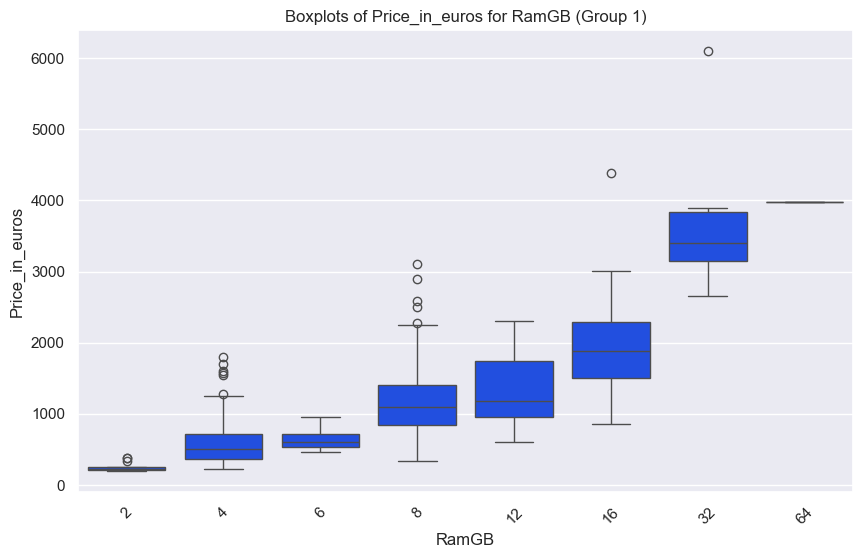

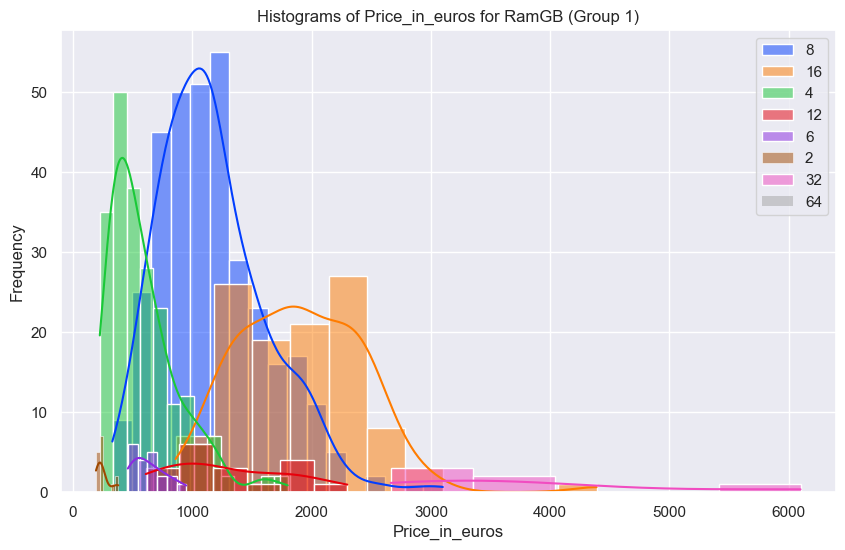

In [16]:
for cat_feature in cat_features:
    if cat_feature not in cat_features_high_card:
        viz.plot_categorical_numerical_relationship(train_set, cat_feature, target, group_size=cat_max_nunique)
        viz.boxplots_grouped(train_set, cat_feature, target, group_size=cat_max_nunique)
        viz.plot_histograms_grouped(train_set, cat_feature, target, group_size=cat_max_nunique)
    

Es algo complicado y lento de analizar visualmente pero la mayoría de variables parecen interesantes.

Lo único a resaltar es que hay algunos valores de outliers, condicionados a la clase a la que pertecen, que también se podría eliminar para que el modelo generalice mejor, pero de nuevo, `aquí no se van a eliminar outliers`. Puede que en futuros modelos sí convenga hacerlo.

## 4.4 Variables numéricas

Vamos a hacer ahora un análisis de correlación con el *target* de las variables representadas numéricamente (que no es lo mismo que decir que son numéricas), y de colinealidad, porque puedo sacar nuevas conclusiones.

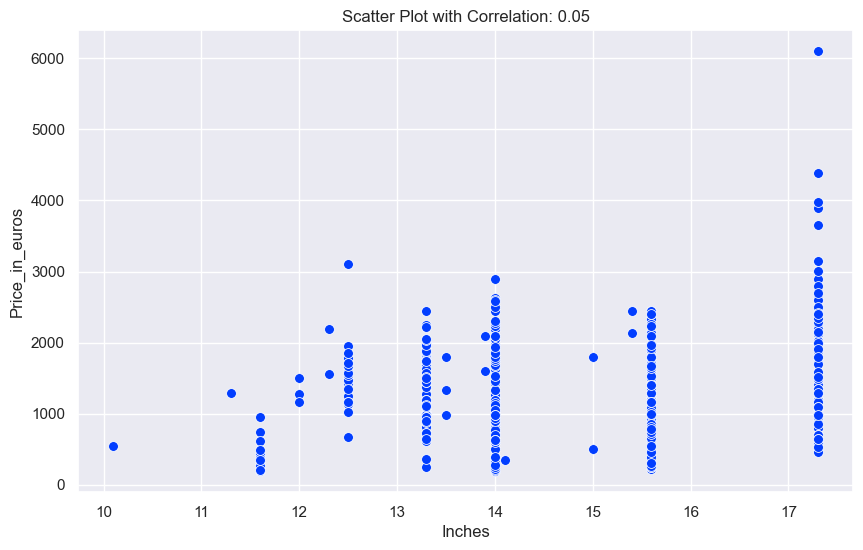

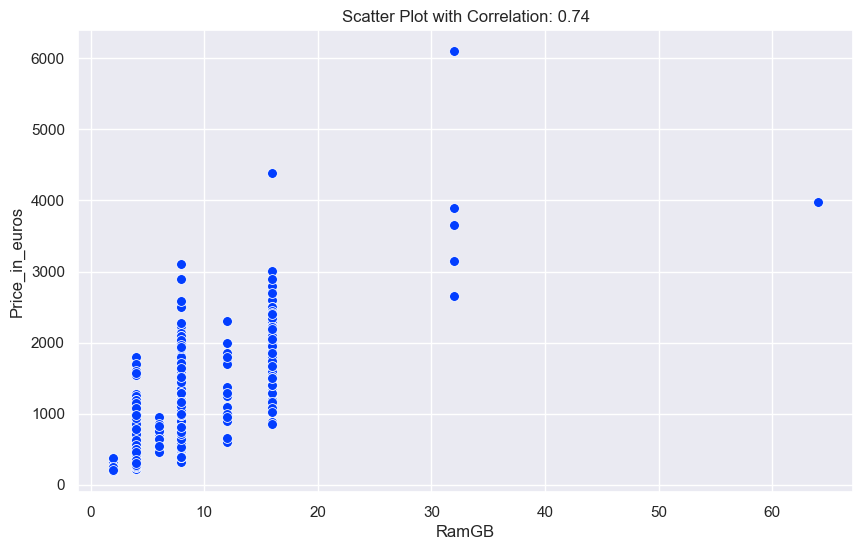

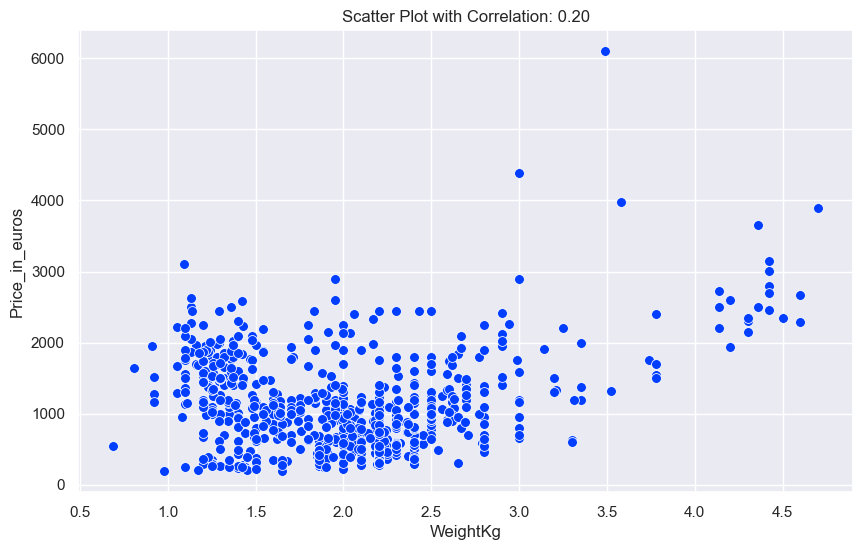

In [17]:
for col in ['Inches', 'RamGB', 'WeightKg']:
    viz.scatterplot_with_correlation(train_set, col, target)

<Axes: >

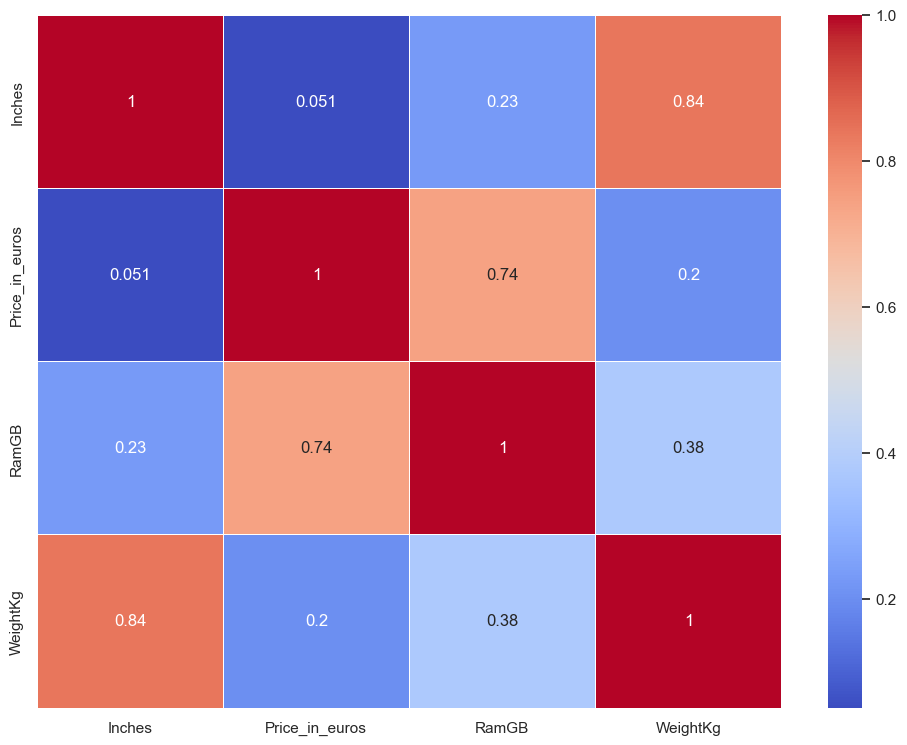

In [18]:
# Matriz de correlación
corr_matrix = train_set.corr(numeric_only=True)
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5)

Conclusiones de esta matriz de correlaciones:

- Si tratara "RamGB" como una numérica discreta, encuentro que tiene una alta correlación con "Price_in_euro", y puede que fuera más conveniente que tratarla como una categórica.
- Aparecen sin embargo algunas colinealidades altas también, especialmente entre "WeightKg" y "RamGB".

Todas las conclusiones que se han sacado en este Notebook servirán para procesar las features de otra forma y evaluar el modelo de regresión en [nb02_catboost_predictions.ipynb](./nb02_catboost_predictions.ipynb).